# Fronteira de decisão para regressão logística

Para este caso de estudo, vamos selecionar um conjunto de dados composto por 2 variáveis. Portanto, a sigmoid será representada da seguinte forma:

$$\sigma(x) = \dfrac{1}{1 + \exp(-{\theta_0 - \theta_1 x_1 - \theta_2 x_2})}$$

em que em nosso caso $x_1$ é a coluna age e $x_2$ a coluna physical_score.

Resolvendo essa equação, utilizando ao fato de que a fronteira de decisão é assumida para um threshold de 1/2, temos que a equação para a linha que divide os dados é:

$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$$

Sendo assim, para traçarmos uma linha reta, passemos a equação para sua forma reduzida:

$$x_2 = -x_1\dfrac{\theta_1}{\theta_2} - \dfrac{\theta_0}{\theta_2} = mx_1 + b$$

em que

$$ m = - \dfrac{\theta_1}{\theta_2} $$

e 

$$ b = -\dfrac{\theta_0}{\theta_2} $$

Vamos então encontrar quem são esses parâmetros, montar a equação de separação entre as classes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Carregamento e divisão dos dados

In [2]:
path = 'C:\\Users\\user\\Desktop\\decision_boundary_logreg\\data\\hearing_test.csv'
data = pd.read_csv(path)

df = data.copy()

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
x = df.drop('test_result', axis=1)
y = df['test_result']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Modelo de regressão logística

In [6]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

## Parâmetros advindos do modelo que serão utilizados na equação da reta

In [7]:
thetha0 = model.intercept_[0]
theta1 = model.coef_[0][0]
thetha2 = model.coef_[0][1]

In [8]:
m = - (theta1 / thetha2)
b = - (thetha0 / thetha2)

## Limites para a função de fronteira e expressão matemática

In [9]:
xmin, xmax = 0, 100
ymin, ymax = 0, 60
xd = np.array([xmin, xmax])
yd = m * xd + b

## Gráfico

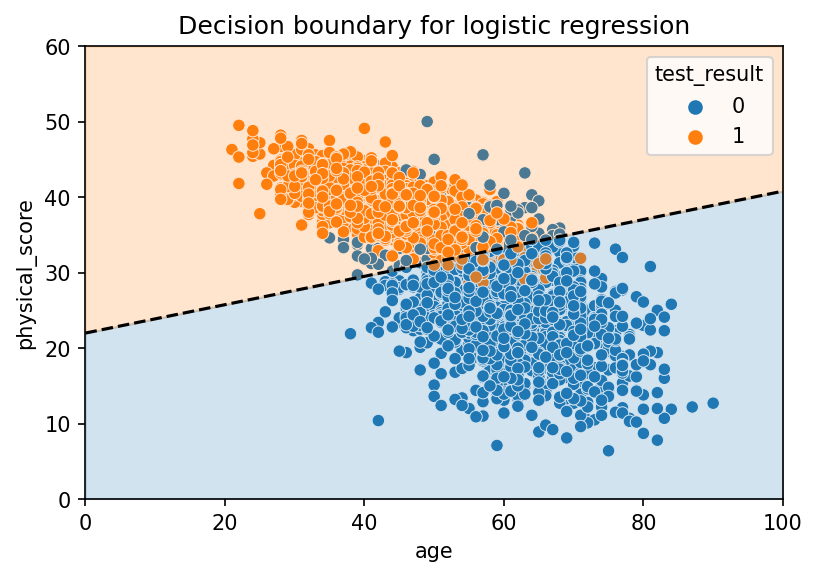

In [22]:
plt.figure(dpi=150)
plt.plot(xd, yd, color='black', ls='--')
sns.scatterplot(x=x_train['age'], y=x_train['physical_score'], hue=y_train)
plt.title('Decision boundary for logistic regression')
plt.xlim(0, 100)
plt.ylim(0, 60)
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
plt.show()